In [2]:
import time
import numpy as np

import galsim
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from galsim.gsparams import GSParams 
#from galsim_test_helpers import *

In [3]:
gsparams = galsim.GSParams(maximum_fft_size=8192)#minimum_fft_size=4096,maximum_fft_size=8192*2,folding_threshold=5.e-3,stepk_minimum_hlr=5)

In [47]:
pixel_scale = 0.1
lamda = 550 #nm
diameter = 1.2 #m
fov = 50 #as
oversample = 10.
airy = galsim.Airy(lam=lamda, diam=diameter, scale_unit=galsim.arcsec, obscuration=0.3,gsparams=gsparams)
pixel = galsim.Pixel(pixel_scale,gsparams=gsparams)
psf = galsim.Convolve(airy, pixel,real_space=False)

psfii_size = 2048
#psfii_size = fov / (pixel_scale/oversample)
print psfii_size
image_psf=psf.drawImage(scale=pixel_scale,method='no_pixel')

oversampled_image_psf=galsim.ImageF(psfii_size,psfii_size)
oversampled_image_psf=psf.drawImage(image=oversampled_image_psf, scale=pixel_scale/10.,method='no_pixel')
psfii = galsim.InterpolatedImage(oversampled_image_psf,gsparams=gsparams)
psfiiIm = psfii.drawImage(image=oversampled_image_psf.copy(),scale=pixel_scale/10.,method='no_pixel')

2048


In [48]:
airy.drawImage(scale=pixel_scale).array.sum()

0.998389

In [49]:
galsim.__version__

'1.5.1'

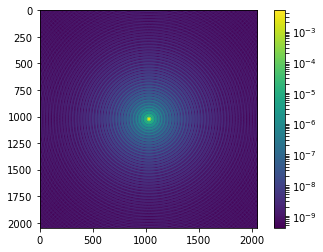

4.656613e-10

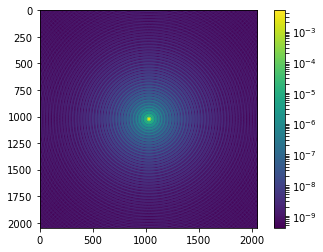

In [24]:
plt.imshow(oversampled_image_psf.array,norm=LogNorm())
plt.colorbar();plt.show()
plt.imshow(psfiiIm.array,norm=LogNorm())
plt.colorbar()
np.max(np.abs(psfiiIm.array - oversampled_image_psf.array))

In [25]:
gal = galsim.Gaussian(half_light_radius = 2, flux=100,gsparams=gsparams)

In [26]:
dil=2

obs = galsim.Convolve(gal, psf)
obsIm = obs.drawImage(scale=pixel_scale, method='no_pixel')
print(obsIm.array.shape)
obsIm = galsim.ImageF(obsIm.array.shape[0]*dil, obsIm.array.shape[1]*dil)
obsIm = obs.drawImage(image=obsIm, scale=pixel_scale, method='no_pixel')

vmin=np.min(obsIm.array)
vmax=np.max(obsIm.array)

obs = galsim.Convolve(gal, psfii,real_space=False)

print(obsImii.array.shape)
obsImii = galsim.ImageF(obsIm.array.shape[0], obsIm.array.shape[1])
obsImii = obs.drawImage(image=obsImii, scale=pixel_scale)#, method='no_pixel')

(230, 230)
(222, 222)


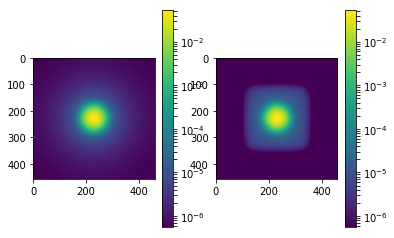

In [27]:
fig,ax=plt.subplots(1,2)
f1=ax[0].imshow(obsIm.array,norm=LogNorm(),vmin=vmin,vmax=vmax)
f2=ax[1].imshow(np.abs(obsImii.array),norm=LogNorm(),vmin=vmin,vmax=vmax)
fig.colorbar(f1,ax=ax[0])
fig.colorbar(f2,ax=ax[1])

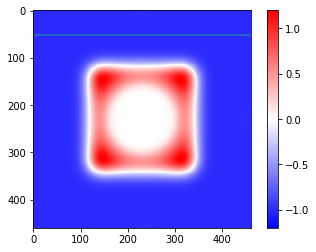

In [28]:
plt.imshow(obsImii.array/obsIm.array-1.,vmin=-1.2,vmax=1.2,cmap=cm.bwr)
#plt.axhline(obsImii.array.shape[0]/4)
plt.axhline(1024/10/2)
plt.colorbar()

In [12]:
print obsImii.array.shape[0]/2

230


In [36]:
obsImii.array

array([[-2.1209984e-10, -2.1273931e-10, -2.1361729e-10, ...,
        -6.8057469e-11, -6.7604020e-11, -6.7744421e-11],
       [-2.1661163e-10, -2.1741012e-10, -2.1844344e-10, ...,
        -7.6515114e-11, -7.5668534e-11, -7.5403551e-11],
       [-2.2097840e-10, -2.2191592e-10, -2.2308336e-10, ...,
        -8.5120452e-11, -8.3891581e-11, -8.3229576e-11],
       ...,
       [-8.1387126e-11, -8.1817837e-11, -8.2838930e-11, ...,
        -2.0889684e-10, -2.0817502e-10, -2.0768758e-10],
       [-7.3884045e-11, -7.3961018e-11, -7.4641952e-11, ...,
        -2.0495058e-10, -2.0436523e-10, -2.0401771e-10],
       [-6.6511636e-11, -6.6227683e-11, -6.6558821e-11, ...,
        -2.0082548e-10, -2.0039452e-10, -2.0020390e-10]], dtype=float32)

In [4]:
gsparams?